In [ ]:
# Pas 1: Configurar l'entorn
import zipfile
import os

from google.colab import files

# pujar el ZIP des de la carpeta en local on tinguis les imatges
uploaded = files.upload()

Saving captcha_images.zip to captcha_images.zip


In [ ]:
# extreure l'arxiu amb totes les imatges al colab
with zipfile.ZipFile('/content/captcha_images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/captcha_images')

In [ ]:
# Pas 2: imports
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import load_model

In [ ]:
# Pas 3: extreure la target value i els paths de totes les imatges
data_dir = "/content/captcha_images/captcha_images_v2_queueit"
image_paths = []
labels = []

for filename in os.listdir(data_dir):
    if filename.endswith(".jpeg") or filename.endswith(".png"):
        path = os.path.join(data_dir, filename)
        label = filename.split('-')[1]
        image_paths.append(path)
        labels.append(label)
print(labels)
print(image_paths)

['78X8EX', '1F85LZ1', '56J1XB', '94937R', '7NE1VT7', '5V19GF', '4589AA5', '9KB3HN', '0II32X5', '2KE1YE0', '4ZJ03X', '56F1GU', '18X7AP', '18M9HX', '9J25SE', '9QH7W5', '6LD1VC9', '3W648U4', '16K3K7', '7HP5AC', '54E0N1', '1R904W9', '2X38AT', '5AD5RF9', '2II84X', '6V44KW', '98B4XQ7', '3RY5BG9', '3EU42G6', '72N31V', '4158I81', '3ET3B9', '5HT3C80', '4V10V92', '29S0JB', '385835', '6CV5RD', '7QF05Q', '5ZM8ZW', '61W2R63', '8U81S61', '9FB9GE', '4A32288', '51950A', '7WY6XM5', '40P97W2', '41H0AN1', '6Z81753', '6QR8KQ5', '5Q92EE7', '71B8IT', '7GF4YM6', '6ZR35P', '07S643', '1U83P22', '4UY16F7', '8512UK', '4PM9X8', '2Z83IJ5', '8GD53F2', '6E27FB', '8YJ2CW', '7MV2DY5', '1Z361T1', '1BR5Y6', '8ST3X84', '3E654P', '44Y16G5', '5TK3XE', '57W3QT5', '54U015', '85P4JU', '8A61911', '3ZE6DP8', '3DQ4JB', '6464BB', '1SK93L4', '78X9PW', '5DQ86B0', '81U0982', '8IC5A5', '18456J', '8HM9MZ9', '69J0KH', '6KP8DN', '9D61UL5', '69Y84G1', '0YH296', '2VA1IJ7', '1Y119C', '6Z10RX', '8B56TU', '2BM98T1', '58T8RG8', '3FR0G37', '1R

In [ ]:
# Pas 4: Preprocessat d'imatges
images = []
for path in image_paths:
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (100, 30))
    image = image / 255.0
    images.append(image)

altura = 30
amplada = 100
num_canals = 1 # ja que treballem nomes amb grisos, seria 3 si volem rgb o hsv

images = np.array(images)
images = images.reshape(-1, altura, amplada, num_canals) # -1 pq detecti automàticament el tamany
labels = np.array(labels)

print(images)

['78X8EX' '1F85LZ1' '56J1XB' ... '65I7WI2' '1088QT5' '4ID9L7']
[[[[0.92156863]
   [0.92156863]
   [0.92156863]
   ...
   [0.45098039]
   [0.45098039]
   [0.45098039]]

  [[0.92156863]
   [0.92156863]
   [0.92156863]
   ...
   [0.45098039]
   [0.45098039]
   [0.45098039]]

  [[0.92156863]
   [0.92156863]
   [0.92156863]
   ...
   [0.45098039]
   [0.45098039]
   [0.45098039]]

  ...

  [[0.45098039]
   [0.45098039]
   [0.45098039]
   ...
   [0.92156863]
   [0.92156863]
   [0.92156863]]

  [[0.45098039]
   [0.45098039]
   [0.45098039]
   ...
   [0.92156863]
   [0.92156863]
   [0.92156863]]

  [[0.45098039]
   [0.45098039]
   [0.45098039]
   ...
   [0.92156863]
   [0.92156863]
   [0.92156863]]]


 [[[0.71764706]
   [0.75686275]
   [0.75294118]
   ...
   [0.78039216]
   [0.77254902]
   [0.78823529]]

  [[0.78823529]
   [0.76862745]
   [0.75294118]
   ...
   [0.7372549 ]
   [0.7372549 ]
   [0.7254902 ]]

  [[0.76862745]
   [0.75294118]
   [0.78431373]
   ...
   [0.74117647]
   [0.75686275]
 

In [ ]:
# Pas 5: Convertir les etiquetes al format: [x1,x2,x3,x4,x5,x6,x7]
# on xi es un valor del 0 al 35 representant un caracter possible

characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_to_num = {char: idx for idx, char in enumerate(characters)}

max_length = max([len(label) for label in labels])
label_num = []

# TODO: millorar els casos del padding (utilitzar un -1 i en el postprocessat filtrar)
for label in labels:
    label_encoded = [char_to_num[char] for char in label]
    # Padding ja que tenim captchas de tamany diferent (default value = 0)
    while len(label_encoded) < max_length:
        label_encoded.append(0)
    label_num.append(label_encoded)

label_num = np.array(label_num)
print(label_num[0])

[ 7  8 33  8 14 33  0]


In [ ]:
# Pas 6: Fer l'split (podem ajustar el test_size)
proporcio_de_test = 0.2
X_train, X_val, y_train, y_val = train_test_split(images, label_num, test_size=proporcio_de_test, random_state=42)

In [ ]:
# Pas 7: Construir el model
def create_model():
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 30, 1), kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

    # capa per transformar cada posició en un vector de 36 posicions per representar els pesos dels caracters
    model.add(layers.Dense(7 * 36, activation='softmax'))

    model.add(layers.Reshape((7, 36)))

    return model

model = create_model()

# utilitzem adam com optimitzador, s'encarrega basicament de que si la direcció del gradient és constant en unes
# iteracions consecutives, augmenta el valor de l'alpha pq vagi més ràpid
# utilitzem com a funció de perduda la sparse_categorical_crossentropy ja que tenim:
      # Classe 0: [1, 0, 0,...]
      # Classe 1: [0, 1, 0,...]
      # ...
      # Classe 6: [0, 0, 1,...]

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Pas 8: Carregar un model des d'una carpeta del drive o entrenar-lo
from google.colab import drive
drive.mount('/content/drive')

ruta_model = '/content/drive/MyDrive/models/captcha_64_128_256_reg.h5'

if os.path.exists(ruta_model):
    print("Carregant desde Google Drive...")
    model = load_model(ruta_model)
else:
    print("El model no existex. Entrenant model...")
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        batch_size=64)

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Perduda en la validació: {val_loss}, Accuracy en la validació: {val_accuracy}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Carregant desde Google Drive...


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8312 - loss: 0.9339
Perduda en la validació: 0.9466717839241028, Accuracy en la validació: 0.8258664011955261


In [ ]:
# Pas 9: Guardar el model en cas de que es vulgui

nom_model = 'captcha_64_128_256_reg.h5'
ruta_model = os.path.join('/content/drive/MyDrive/models', nom_model)
model.save(ruta_model)

In [ ]:
# Pas 10: Carregar una imatge des de el local per testejar

altura = 30
amplada = 100

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (amplada, altura))
    img = img / 255.0

    # convertir a (30, 100, 1)
    img = np.expand_dims(img, axis=-1)

    # afegir una dimensió adicional per representar un batch de tamany 1
    img = np.expand_dims(img, axis=0)  # (1, 30, 100, 1)

    return img

def predict_captcha(model, image_path):
    img = preprocess_image(image_path)

    pred = model.predict(img)

    pred_text = ''

    # iteració sobre tots els possibles valors de sortida
    for i in range(pred.shape[1]):  # pred.shape[1] es igual a max_length (7)
        # ens quedem amb el valor més gran dels 36 possibles
        char_idx = np.argmax(pred[0, i])
        pred_text += characters[char_idx]

    return pred_text

def decode(coded):
  ret = []
  for i in range(len(coded)):
    ret.append(characters[coded[i]])

  return ret

Captcha a predir codificat:  [ 4  0 32  1 15 34  9]
Captcha a predir decodificat:  40W1FY9


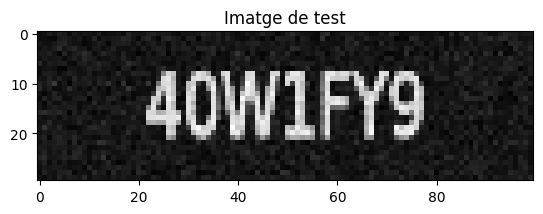

In [ ]:
# Pas 11.1: Experimentació d'imatges

# import random
# per si volem provar un valor random
# value = random.randint(0, len(X_val) - 1)

value = 7 # triar un valor a dit del conjunt de validació

print("Captcha a predir codificat: ", y_val[value])
text_format = decode(y_val[value])
text_format = ''.join(text_format)
print("Captcha a predir decodificat: ", text_format)

test_image = X_val[value]
plt.imshow(test_image.reshape(altura, amplada), cmap='gray')
plt.title("Imatge de test")
plt.show()

In [ ]:
# Pas 11.2: Experimentació d'imatges (carregar la imatge del local)

nom_imatge = 'captcha-40W1FY9-1719669444805.jpeg'
image_path = os.path.join('/content/captcha_images/captcha_images_v2_queueit/', nom_imatge)
# print(image_path)

predicted_text = predict_captcha(model, image_path)
print()
print("VALOR PREDIT: ", predicted_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

VALOR PREDIT:  40M1FY9
